# COGS 108 - Final Project 

# Overview

Our project aims to determine how a teen’s level of involvement in school may affect alcohol consumption levels. We will be looking at data regarding a teen’s study time, final grades, whether they attend additional paid classes, aim to go to higher education and their amount of school absences. 

# Github link

https://github.com/kaiitheguy/FinalProjectGroup62

# Names

- Yikai Chen
- Shu Yao Wu
- James Beighley
- Falak Hotchandani
- Katherine Ngo

# Group Members IDs

- A13531003
- A13579395
- A13103167
- A15711717
- A14530341

# Research Question

How does involvement and performance in school contribute to changes in alcohol consumption amongst high school students?

## Background and Prior Work

Unhealthy alcohol use among students is a major public health concern. Although there are already many research reports(Reference 1 and 3) showing the level of alcohol consumption among undergraduate students, the research on the alcohol consumption level of high school students is still almost blank. The aim of the current research is to describe drinking patterns of US high school students along with their school involvement. 

From doing background research, we identified several common leads and motives in teenager alcohol usage(References 4 and 5). From those studies, we found that if the child does not partake in activities outside of school and school involvement is a crucial attributive cause in teenager alcohol usage. So we decided to research the correlation between alcohol usage, extracurricular activities, and school involvement. We also learned how to better measure alcohol consumption(Reference 2) so that we could relate alcohol consumption better with usage and have a better understanding of the dataset(Reference 6) we are using. 
References (include links):
Changes in undergraduate student alcohol consumption as they progress through university https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-8-163
Measuring Alcohol Consumption in the United States https://link.springer.com/chapter/10.1007/978-1-4899-1669-3_3
College Student Alcohol Consumption, Day of the Week, and Class Schedule https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1530-0277.2007.00402.x
Examining the role of drinking motives in college student alcohol use and problems. https://psycnet.apa.org/record/2003-04910-004
The burden of alcohol use: Excessive alcohol consumption and related consequences among college students. https://psycnet.apa.org/record/2014-07285-012
Student Alcohol Consumption https://www.kaggle.com/marcdeveaux/student-alcohol-consumption/data?fbclid=IwAR3hHE1tr1PkaKMKZDplvOV5fQ4xL-Lwj0s75quYg3zeY61T0qEnDvDTJvo


In conclusion, the correlation we want to find out should be lined along with school involvement of the students. Using the dataset in Reference 6, we could get data of level of student alcohol consumption and student school involvement.


# Hypothesis


Our group believes that if a student is more involved in school, they will consume less alcohol than the students who are less involved in the school. Being more involved in school means the student spends a good amount of time studying, has average to high grades, and partakes in extracurricular activities. The reason we believe this may be true is that if students are busy with school, they care more about their education rather than consuming alcohol and will be too busy to spend time drinking. 


# Dataset(s)

- Dataset Name: Student Alcohol Consumption
- Link to the dataset: https://www.kaggle.com/uciml/student-alcohol-consumption?fbclid=IwAR2_MlaQXajzt3m9nxq5EPlHWKr8E66t6HuUoq5aAyoD5lgYU2JIy9p2rSo
- Number of observations: 1044

The data set that we are using actually consists of two data sets with the same questions. Both data sets contain information about the student's study information, gender, family background and alcohol consumption. One data set targeted students taking math courses in high school while the other data set targeted students taking a Portuguese class in high school. Since the data had the same categotries, we were able to merge the data together by concatenating them. 

The following attributes apply to our dataset:

studytime - weekly study time (numeric: 1 = < 2 hours, 2 = 2 to 5 hours, 3 = 5 to 10 hours, or 4 = >10 hours)

failures - number of past class failures

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

absences - number of school absences (numeric: from 0 to 93)

final grade - numeric: from 0-20




# Setup

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

There are a lot of columns of data in this data set, so we decided to choose only the relevant columns to keep that related to our hypothesis. Coulmns we felt were not necessary were the ones relating to family life / background, extracurricular activities, gender and age. The main data we wanted to focus on was data regarding involvement in school and alcohol consumption. The data columns we ended up keeping were study time, paid classes, failures of class, wants to take higher education, workday alcohol consumption, weekend alcohol consumption, school absences, final grades. Other than keeping those columns, we also created two new columns to hold the average alcohol consumption data and average school involvement data. 

Overall our data set was very simplified in the sense that there were no variance in answers. For example, for level of alcohol consumption, students were only able to input the numbers 1, 2, 3 , 4 or 5. As a result, we did not have to standardize the data.

In [3]:
# Read two dataframe
stud_mat = pd.read_csv('student-mat.csv')
stud_por = pd.read_csv('student-por.csv')

We started cleaning the data by combining the two data sets that we had and renaming the columns to organize it.

In [4]:
# Combine the two dataset
frames = [stud_mat, stud_por]
df_stud = pd.concat(frames)
df_stud = df_stud.reset_index()

In [5]:
# Delete the columns we don’t need
df = df_stud[['studytime', 'paid', 'failures', 'higher', 'Dalc', 'Walc', 'absences', 'G3']]


In [6]:
# Renaming the columns of the dataframe
df.columns = ["study_time", "paid_classes", "failures_of_class", "want_higher_edu", "workday_alc", "weekend_alc",
              "school_absences", "final_grades"]
df.dtypes


study_time            int64
paid_classes         object
failures_of_class     int64
want_higher_edu      object
workday_alc           int64
weekend_alc           int64
school_absences       int64
final_grades          int64
dtype: object

A simple check was performed to make sure the data had no null data.

In [7]:
df.isnull().sum().sum()

0

In [8]:
#combining the alcohol consumption during the work day and weekend into a new column 'alc'.
alc = 2/7*df['workday_alc']+5/7*df['weekend_alc']
df['alc'] = alc

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#sort the alc column
df = df.sort_values(by=['alc'])

We also wanted to combine the relevant columns to school into one column to measure the average level of a student's school involvement. To do this, we assigned a weight ranging from 1-5 to each column based on how important we thought the column was. For example, we believed that study time should have a higher weight because we believed it would affect a student's school performance more. For the paid classes and wanting higher education columns, we changed the values since they are binary.

The columns we believed would increase school involvement were study time, paid classes, wanting higher education and final grades. The columns that would decrease a student's school involvment would be school absences and failures of classes. 

In [10]:
#Tranformation: convert paid classes and wanting higher education into numerical data
def convert_label(label):
    
    if(label == 'no'):
        return 1.0
    elif(label == 'yes'):
        return 0.0
    else: 
        return label
df['paid_classes'] = df['paid_classes'].apply(convert_label)
df['want_higher_edu'] = df['want_higher_edu'].apply(convert_label)

#Calculate the average involvment of students by using weights
school_involvement = 3*df['study_time'] + 2*df['paid_classes']-3*df['failures_of_class'] + 2*df['want_higher_edu'] - 2*df['school_absences']+ 2*df['final_grades']
df['school_involvement'] = school_involvement


In [11]:
#Print out final data set
df

,study_time,paid_classes,failures_of_class,want_higher_edu,workday_alc,weekend_alc,school_absences,final_grades,alc,school_involvement
0,2,1.0,0,0.0,1,1,6,6,1.000000,8.0
532,1,1.0,1,0.0,1,1,12,11,1.000000,0.0
531,1,1.0,0,0.0,1,1,4,11,1.000000,19.0
522,2,1.0,2,1.0,1,1,0,11,1.000000,26.0
519,2,1.0,0,0.0,1,1,0,11,1.000000,30.0
512,1,1.0,0,0.0,1,1,6,15,1.000000,23.0
511,2,1.0,0,0.0,1,1,4,16,1.000000,32.0
509,2,1.0,0,0.0,1,1,4,10,1.000000,20.0
508,1,1.0,0,0.0,1,1,10,18,1.000000,21.0
507,2,1.0,1,0.0,1,1,12,10,1.000000,1.0


# Data Analysis & Results

Based on our data, we wanted to plot alcohol consumption against all the other data relating to school involvement, so we decided to create line plots to visualize our data.

In [12]:
df.columns

Index(['study_time', 'paid_classes', 'failures_of_class', 'want_higher_edu',
       'workday_alc', 'weekend_alc', 'school_absences', 'final_grades', 'alc',
       'school_involvement'],
      dtype='object')

First, we plot level of weekend alcohol consumption against each factors to check which factor has biggest influence on the weekend alcohol consumption.

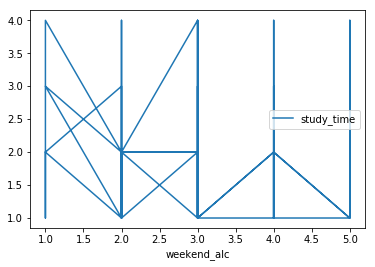

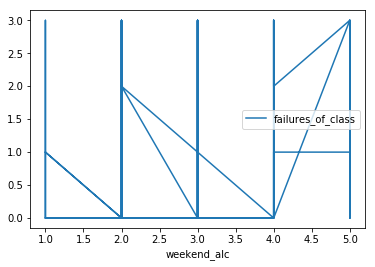

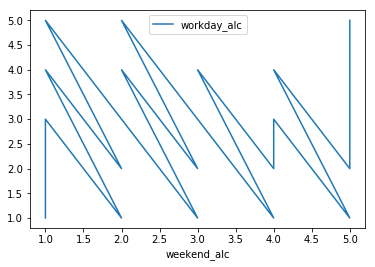

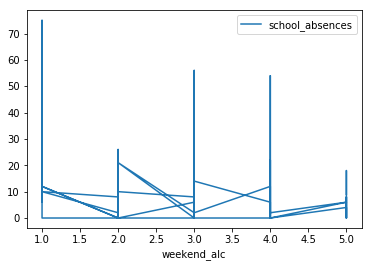

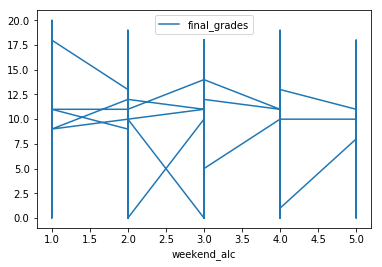

In [13]:
#Plot level of weekend alcohol consumption against each factors
cols = ["study_time", "failures_of_class", "workday_alc",
              "school_absences", "final_grades"]
for col in cols:
    df.plot.line(x='weekend_alc',y=col)


As shown above, we could see that weekend alcohol consumption is the most correlated to workday alcohol consumption and school absense.

Second, we plot level of workday alcohol consumption against each factors to check which factor has biggest influence on the workday alcohol consumption.

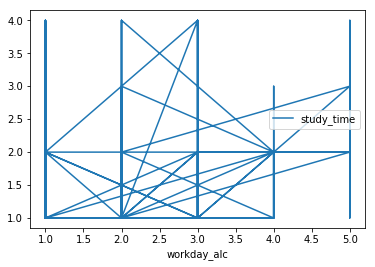

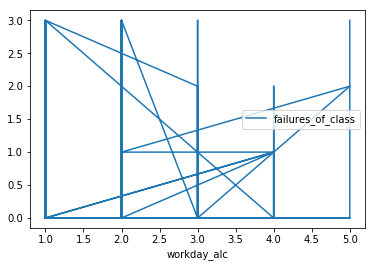

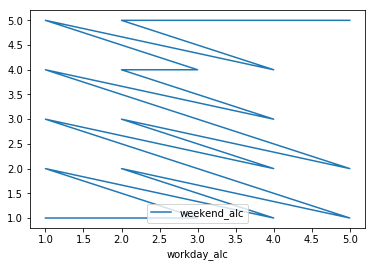

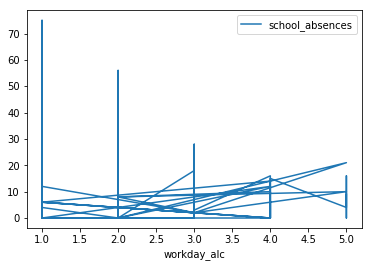

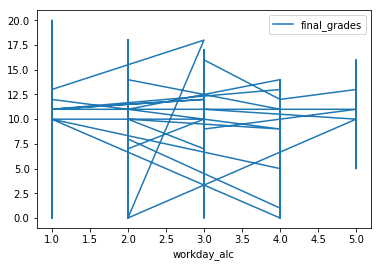

In [14]:
#Plot level of workday alcohol consumption against each factor
cols = ["study_time", "failures_of_class", "weekend_alc",
              "school_absences", "final_grades"]
for col in cols:
    df.plot.line(x='workday_alc',y=col)


As shown above, we could see that workday alcohol consumption is the most correlated to weekend alcohol consumption and school absense.

Because the weekend alcohol consumption has a more strong correlation with other factors than workday alcohol consumption. We plan to weight the two alcohol consumption into one variablt and give the percentage as 7/3 of weekend/workday.

Then, we plot the average level of alcohol consumption after weighting against each factor

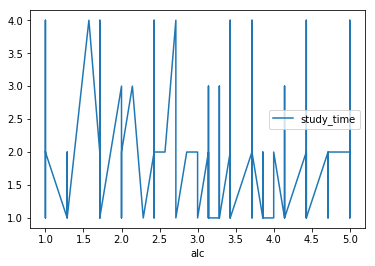

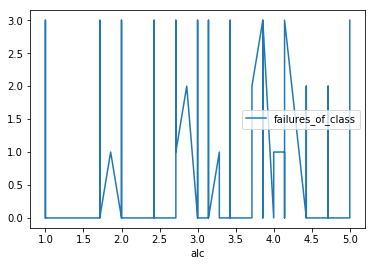

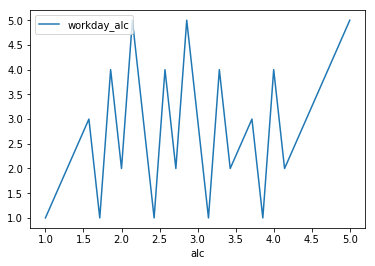

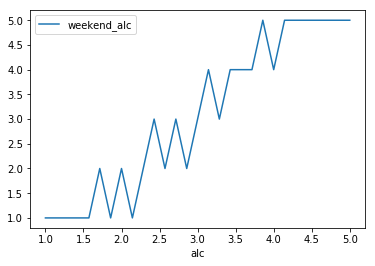

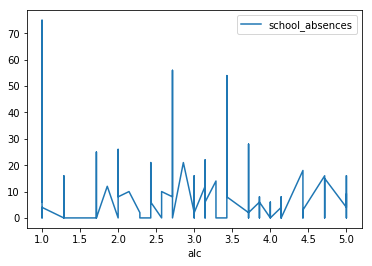

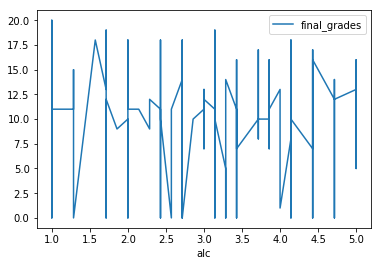

In [15]:
#Plot average level of alcohol consumption against each factor
cols = ["study_time", "failures_of_class", "workday_alc", "weekend_alc",
              "school_absences", "final_grades"]
for col in cols:
    df.plot.line(x='alc',y=col)


Just from looking at the graphs above, we were unable to find a correlation between alcohol consumption and school invovlment. As a result, we decided to try other graphs to see if we can get a better visualization of the data. This is the addition to show how weekend alcohol is a better data than workday alcohol consumption. 

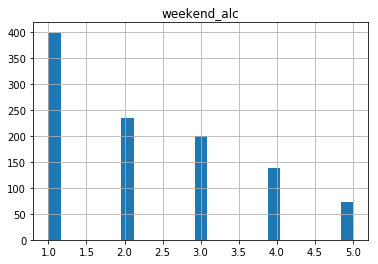

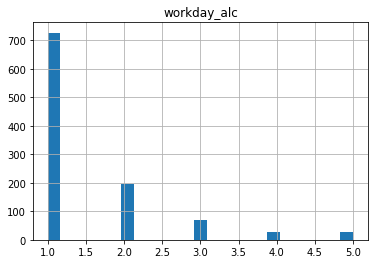

In [16]:
f4 = df.hist('weekend_alc',bins=25)
f5 = df.hist('workday_alc',bins=25)
f4 = plt.gcf()
f5 = plt.gcf()

As our data has 2 columns for measuring alcohol consumption, we decided to merge the two to simplify our data and get an average of how much alcohol is consumed in general by one student, regardless of whether it is the weekend or workday. We decided this would be best, as the number of people consuming the alcohol varies between the two times as well. Then the average alcohol consumption was plotted against school absences to see if there is a correlation between the two. We used the weights 5/7 for weekday consumption because there are 5 days in the week and 2/7 for weekend consumption because there are 2 days in the weekend. 

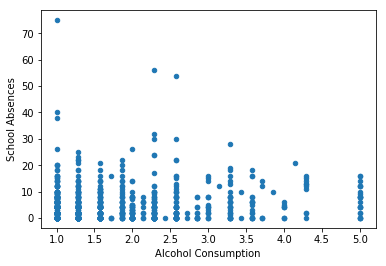

In [17]:
#Combine the two alcohol consumption data using a weight of 5/7 for workday consumption and 2/7 for weekend consumption.

alc = 5/7*df['workday_alc']+2/7*df['weekend_alc']
df['alc'] = alc

#Create a scatter plot
plt.scatter(df['alc'], df['school_absences'], s=20)
plt.xlabel('Alcohol Consumption')
plt.ylabel('School Absences')
workday_absence = plt.gcf()

From the above graph, it shows that there is not really a correlation between alcohol consumption and school absences. Most people have school absences ranging from 0-20 regardless of their level of alcohol consumption. 

We also graphed the study time of students who put 1 as their level of alcohol consumption and students who put 5 as their level of consumption during the workday. This data is hard to analyze because there are more students who put 1 as their level of consumption versus 5, so there is more data for 1 than there is for 5. Around 175 of students who has a level 1 alcohol consumption said they studied for an hour and only 14 students who has a level 5 alcohol consumption said they studied for one hour.

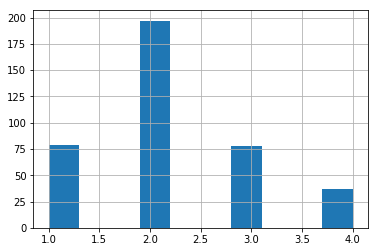

In [18]:
#study time of students who put 1 as their level of alcohol consumption during workdays
workday = df[df['alc'] == 1]['study_time']
f2 = workday.hist()
f2 = plt.gcf()

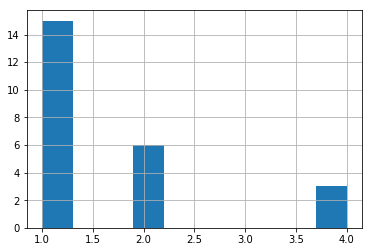

In [19]:
#study time of students who put 5 as their level of alcohol consumption during workdays
workday1 = df[df['alc'] == 5]['study_time']
f1 = workday1.hist()
f1 = plt.gcf()

From the above graphs, at first glance, it seems that students who put 5 as their level of alcohol study less than people who put 1, but we know that is not the case. It only seems that way because the axis are not the same. Therefore we decided to plot the data by percentage using a pie chart. First we counted the amount of people in level 1 alcohol consumption and level 5 alcohol consumption, then we divided that number by the total amount of participants in the survey.

2    197
1     79
3     78
4     37
Name: study_time, dtype: int64


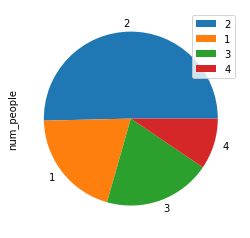

In [20]:
num_people = df[df['alc'] == 1]['study_time'].value_counts()
print(num_people)

df_pie = pd.DataFrame({'num_people':num_people},
                    index = [2,1,3,4])
df_pie.plot.pie(y='num_people')

1    15
2     6
4     3
Name: study_time, dtype: int64


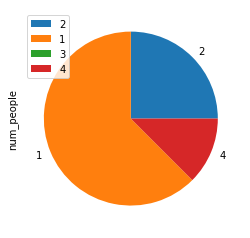

In [21]:
num_people = df[df['alc'] == 5]['study_time'].value_counts()

print(num_people)
#plt.pie(df['workday_alc'] == 1, labels = df['study_time'], startangle=90, autopct='%.1f%%')
df_pie = pd.DataFrame({'num_people':num_people},
                     index = [2,1,3,4])
df_pie.plot.pie(y='num_people')

In [22]:
w_a = df['workday_alc'].unique()
# Exclude 5 because sample is too small
w_a = [1,2,3,4,5]
avg_study = []
for i in w_a:
    temp_study = df[df['workday_alc'] == i]['study_time']
    avg_study.append(np.mean(temp_study))
avg_study
#plt.plot(x=w_a, y=avg_study)
#plt.show()
df_l = pd.DataFrame({'avg_study':avg_study},
                     index = w_a)
#lines = df_l.plot.line()
avg_study
df['workday_alc'].value_counts()

1    727
2    196
3     69
5     26
4     26
Name: workday_alc, dtype: int64

## Finalized data result and Visualization

After all the things done above, we decide to give a weight to all factors related to the study to give student a variable called school performance. This is mostly calulated from the final grades minus school absences. Then plus weighted study time and failure of class.

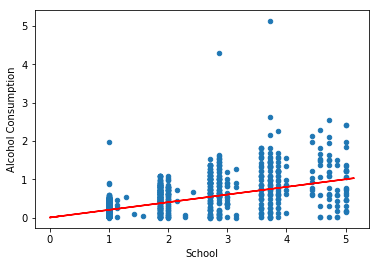

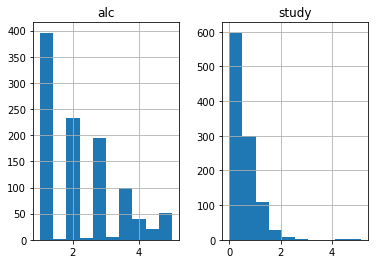

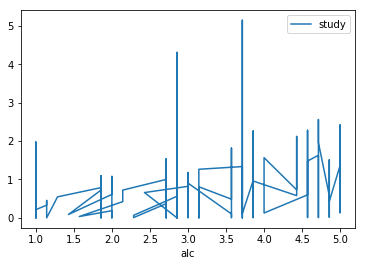

In [23]:
#higher_edu = df['want_higher_edu']
    
# study_will = (0.1*df['study_time'])-(0.1*df['failures_of_class'])-(0.1*df['school_absences'])+(df['final_grades'])
study_will = (df['weekend_alc']/100)*((0.1*df['study_time'])-(0.1*df['failures_of_class'])-(1.5*df['school_absences'])+(1.5*df['final_grades']))
study_will = abs(study_will)*2
alc = 1/7*df['workday_alc']+6/7*df['weekend_alc']
alc
df_w = pd.DataFrame({'alc':alc,
                    'study':study_will})
df_w
plt.scatter(df_w['alc'], df_w['study'], s=20)
plt.ylabel('Alcohol Consumption')
plt.xlabel('School')
plt.plot(df_w['study'], df_w['study']*0.2, color='red')
f1 = df_w.hist()
f1 = plt.gcf()
df_w.plot.line(x='alc',y='study')

As we can see the school performance is the data we finally want, we have a positive correlation between school performance and alcohol consumption. We plot the correlation with three kinds of graphs. This is the same as what we hyposethesis is. We could then analyse the relation between alcohol consumption with each factor depending on the weight of each factor in the shcool performance.

Also, we draw the regression line to give out a better understanding of correlation. And we use smpredictor from patsy to do the prediction base on the variable study and alc consumption. Because the purpose of this project is not only find out the correlation but also help high school to prevent high school students' alcohol consumption. We want to give out more sepcific data on the influence from alcohol consumption to the study of students

In [39]:
import patsy
import statsmodels.api as sm

# Correlation analysis with study and alc
df_s = df_w.head(5)
outcome, predictors = patsy.dmatrices('study ~ alc', df_s)
mod_all = sm.OLS(outcome, predictors)
res_all = mod_all.fit()
print(res_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  study   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 12 Jun 2019   Prob (F-statistic):                nan
Time:                        19:35:37   Log-Likelihood:                 2.6680
No. Observations:                   5   AIC:                            -3.336
Df Residuals:                       4   BIC:                            -3.727
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0910      0.035      2.565      0.0

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In addition, we draw out the heat map between age and alcohol consupmtion to make a horizontal hypothesis besides our main hypothesis. This is a more direct view of the correlation as the study got influenced by alcohol consumption no matter the student is hard work or not(more hard-working student would have a higher study value).

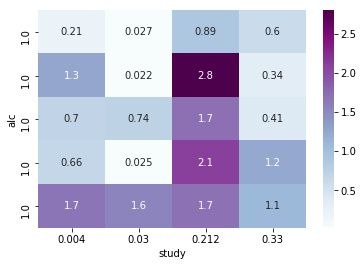

In [40]:
import seaborn as sns
%matplotlib inline

Index= df_w['alc'].head(5)
Cols = df_w['study'].head(4)
df_h = pd.DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df_h, annot=True,cmap="BuPu")

# Ethics & Privacy

An ethical issue we need to consider for our project is privacy. We are exploring a topic that not only reveals that the number of students who perform underage drinking but also forces us to analyze some of their personal backgrounds. The dataset we are using contains a lot of personal information about each student, such as their sex, age, address, family size, parental cohabitation status, parent’s education level, parent’s jobs, the reason they chose to attend their school, guardian, travel time from home to school, study time, number of failed classes, whether they receive extra educational support, whether they receive family education support, whether they take extra paid classes, extracurricular classes, and whether they attended nursery school. Although these data sets consists of a lot of data about each student’s personal background, we justified the use of this dataset because a majority of the information provided to us is binary or numerical, which means that we do not have access to the details of these aspects of their lives. For example, we do not actually have access to their specific addresses. Instead, we only know if they live in a rural or urban area. Also, the data is anonymous so we do not know the identities of the students. The information we analyzed is very general and privacy is not entirely a huge issue in this case. However, we will continue to acknowledge how this information is still private to some extent as we work on our project.
	
The data is completely anonymous so although we have information on different individuals, we do not have access to who they actually are. The information comes from a survey of students taking Math and Portuguese classes at a secondary school. There is consent since the students willingly filled out the survey with their information. The data may not be representative of the general high school population because it only consists of the population of high school students taking Math and Portuguese classes. Also, since the data is from surveys, then there may be bias in our data since the students may not have answered honestly, or they may have misread the question and answered differently. This means that the data may not fully represent the true answers of the students who took the survey. Although this may be an issue, it is is not a significant problem in our project because even though these are answers from a survey, they are answers that do not reflect specific opinions on things so there is not a significant issue with bias. The survey simply gathers mainly objective information about the student’s life, so there is a very low chance of bias in our data.



# Conclusion & Discussion

## Analysis result

Based on our data analysis and visulization, we conclude that alcohol consumption is definitly related to the chool performance. We define the school performance with multiple factors. We use study_time, paid_classes, failures_of_class, want_higher_edu, school_absences, and final_grades to define this higher level factor. We find out that school absence and final grades is the most correlated to the alcohol consumption. And all the other factors seems to have a weak correlation with alcohol consumption. 

## Limitation

We have limitation in the size of dataset. And our dataset is only limited to students in the high school.

## Future plan

In the future, we want to include more data from high shcool and university students because based on our referrence and background research, university alcohol comsumption is much more harsher than sutndents in the high school. 